In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### plot the gaussian hills vs simulation time for wtmetad and ttmetad

the shape of tt_metad_hills is (51460, 7)
the shape of wt_metad_hills is (30860, 7)


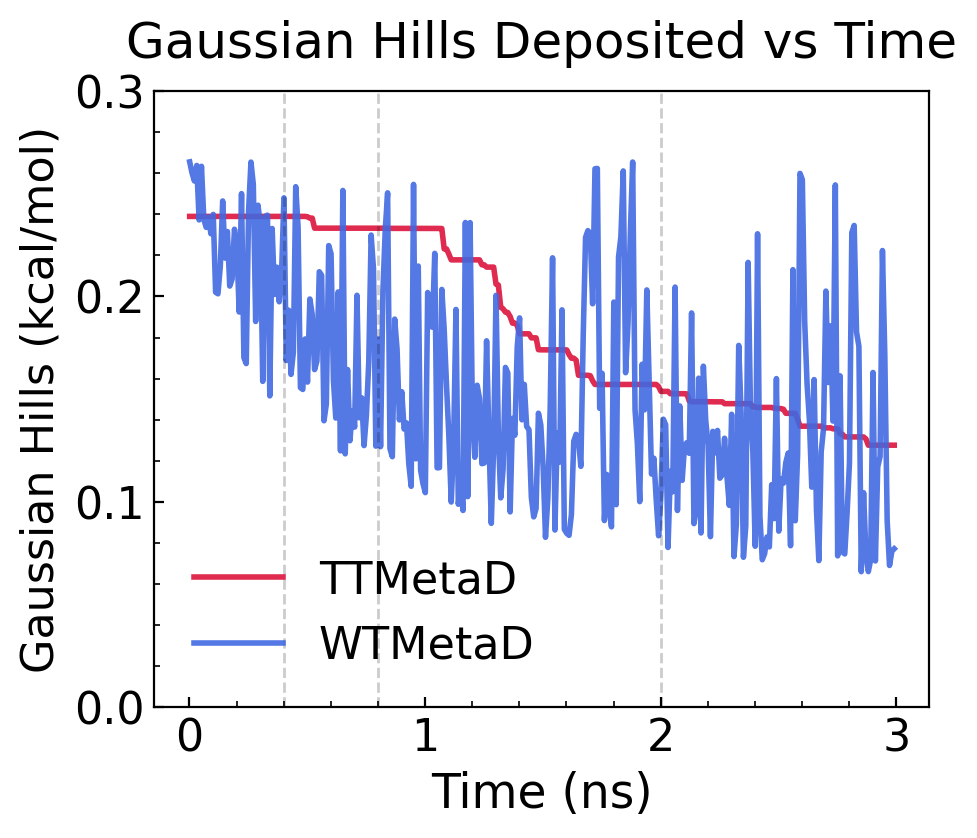

In [2]:
linewidth, alpha = 2, 0.9
fontsize = 14
start, end, jump = 0, 3000, 10

tt_metad_hills = np.loadtxt("HILLS", skiprows=7)
tt_metad_x_y = [tt_metad_hills[:,0][start:end:jump], tt_metad_hills[:,5][start:end:jump]]
print("the shape of tt_metad_hills is", tt_metad_hills.shape)

wt_metad_hills = np.loadtxt("wt_metad_data/HILLS", skiprows=7)
wt_metad_x_y = [wt_metad_hills[:,0][start:end:jump], wt_metad_hills[:,5][start:end:jump]]
print("the shape of wt_metad_hills is", wt_metad_hills.shape)

fig = plt.figure(figsize=(5, 4))
# for each dataset, plot y (height of hills added each time) vs x (time)
plt.plot(tt_metad_x_y[0]/1000, tt_metad_x_y[1]/4.184, label="TTMetaD", color="crimson", linewidth=linewidth, alpha=alpha)
plt.plot(wt_metad_x_y[0]/1000, wt_metad_x_y[1]/4.184, label="WTMetaD", color="royalblue", linewidth=linewidth, alpha=alpha)
plt.title("Gaussian Hills Deposited vs Time", fontsize=fontsize+4, pad=12)
plt.xlabel("Time (ns)", fontsize=fontsize+3)
plt.ylabel("Gaussian Hills (kcal/mol)", fontsize=fontsize+2)
plt.xticks(np.linspace(start/1000,end/1000,4),fontsize=fontsize+2)
plt.yticks(np.linspace(0,0.3,4),fontsize=fontsize+2)
# add three dashed vertical lines at 0.4, 0.8, 2.0
plt.axvline(x=0.4, color='black', linestyle='--', linewidth=1, alpha=0.2)
plt.axvline(x=0.8, color='black', linestyle='--', linewidth=1, alpha=0.2)
plt.axvline(x=2.0, color='black', linestyle='--', linewidth=1, alpha=0.2)
# ticks direction in
plt.tick_params(direction='in')
# minor ticks on for both
plt.minorticks_on()
# minor ticks direction in
plt.tick_params(which='minor', direction='in')

plt.legend(framealpha=0, fontsize=fontsize+2)
plt.savefig("hills_vs_time.png", dpi=300, bbox_inches='tight')

### plot the 2d PMF at 0.4, 0.8, 2.0 ns

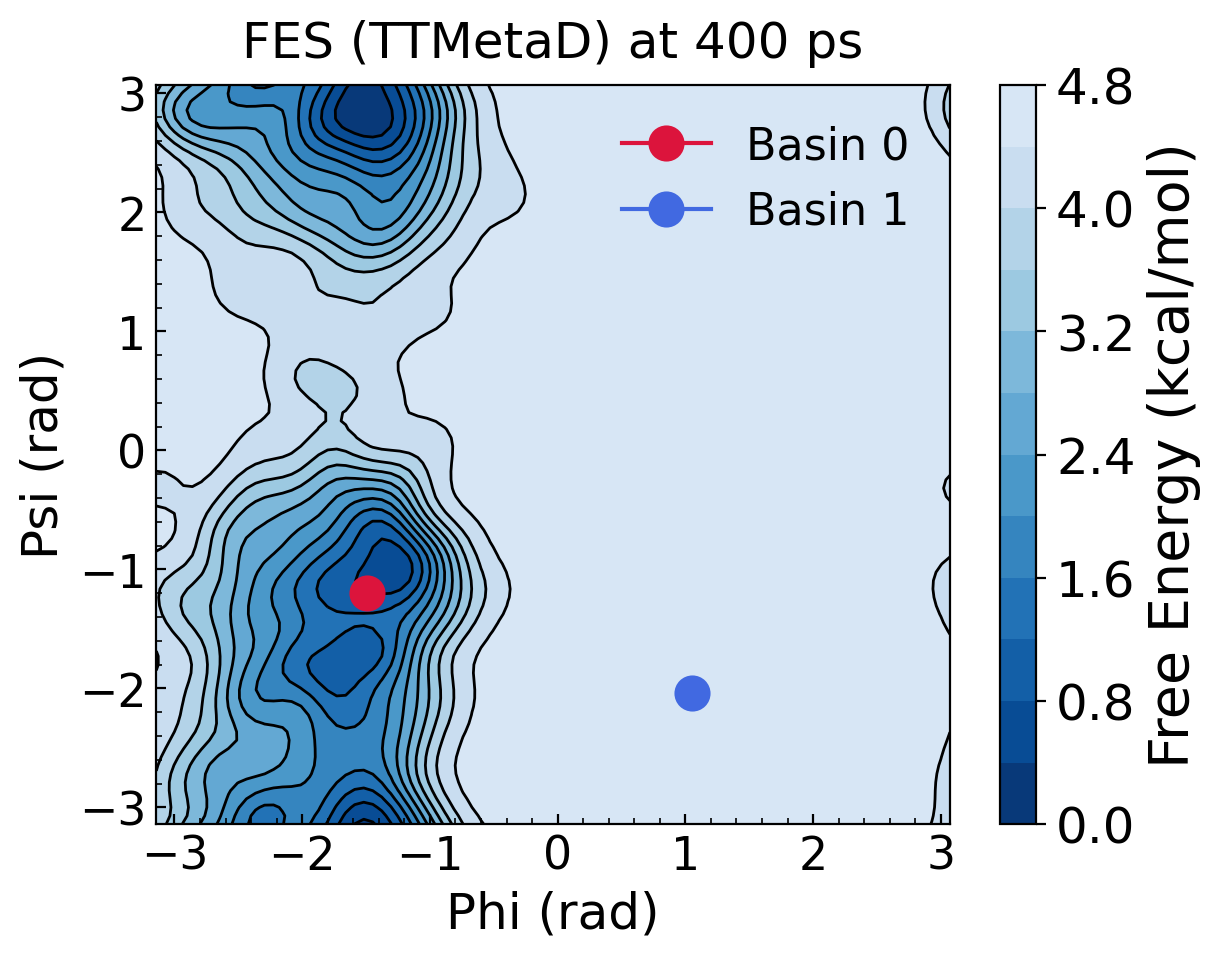

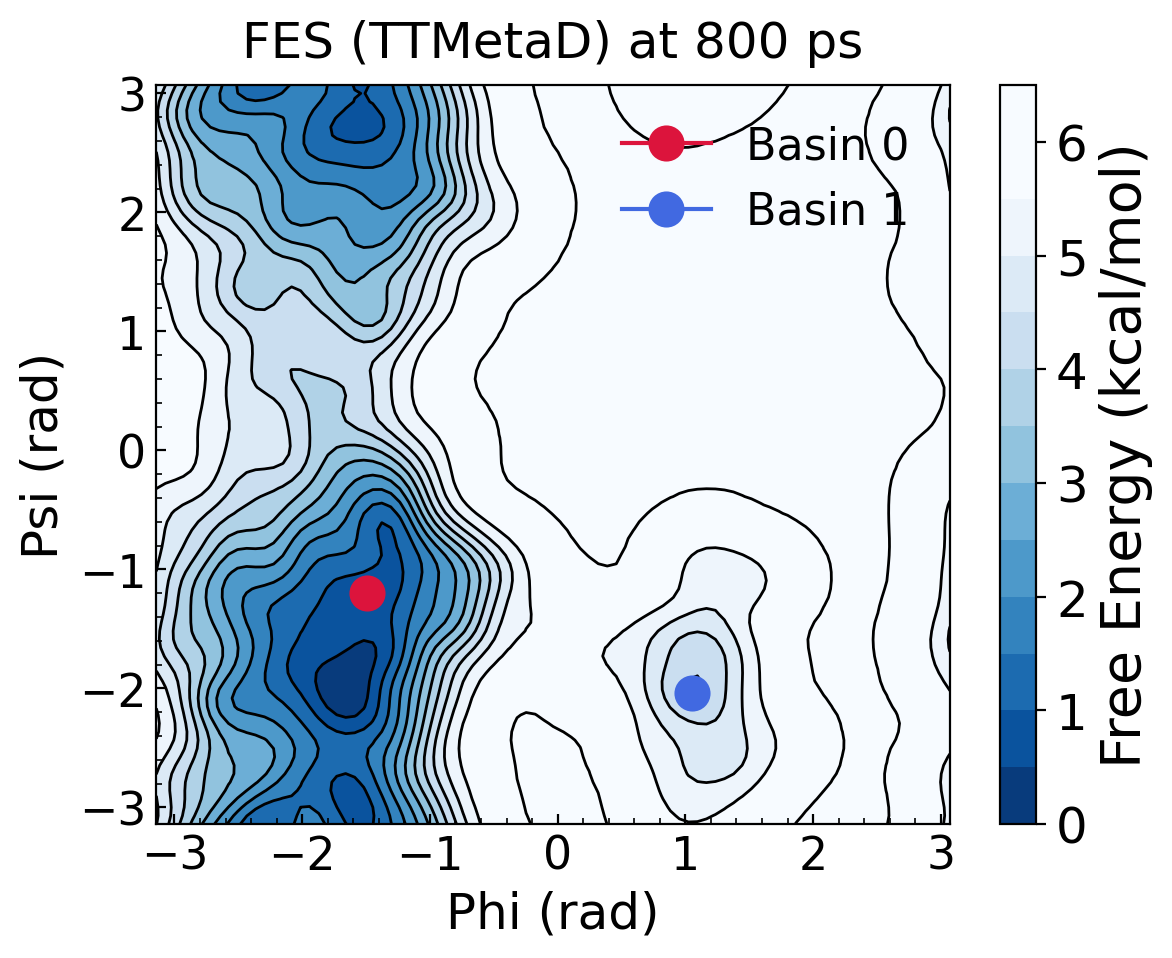

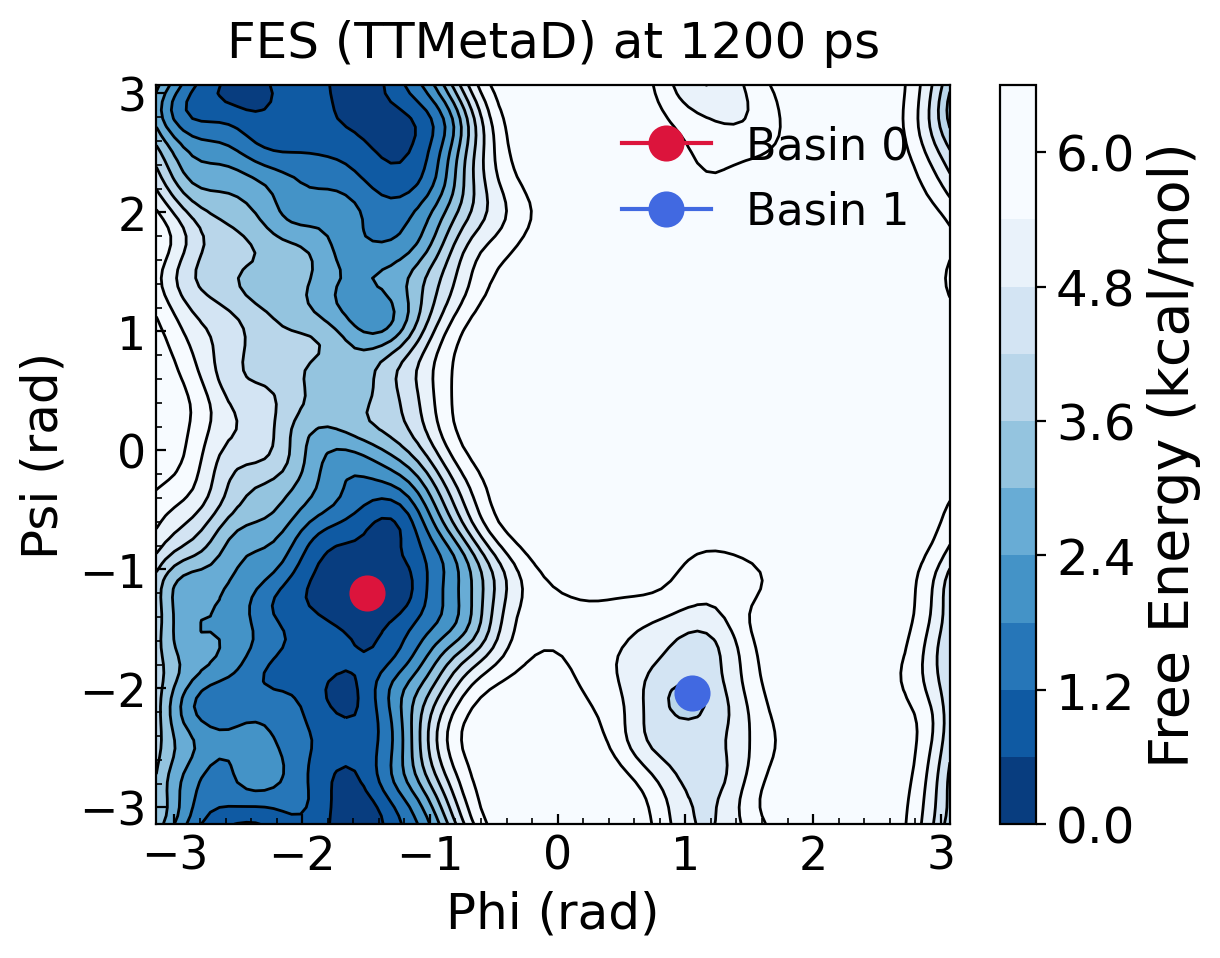

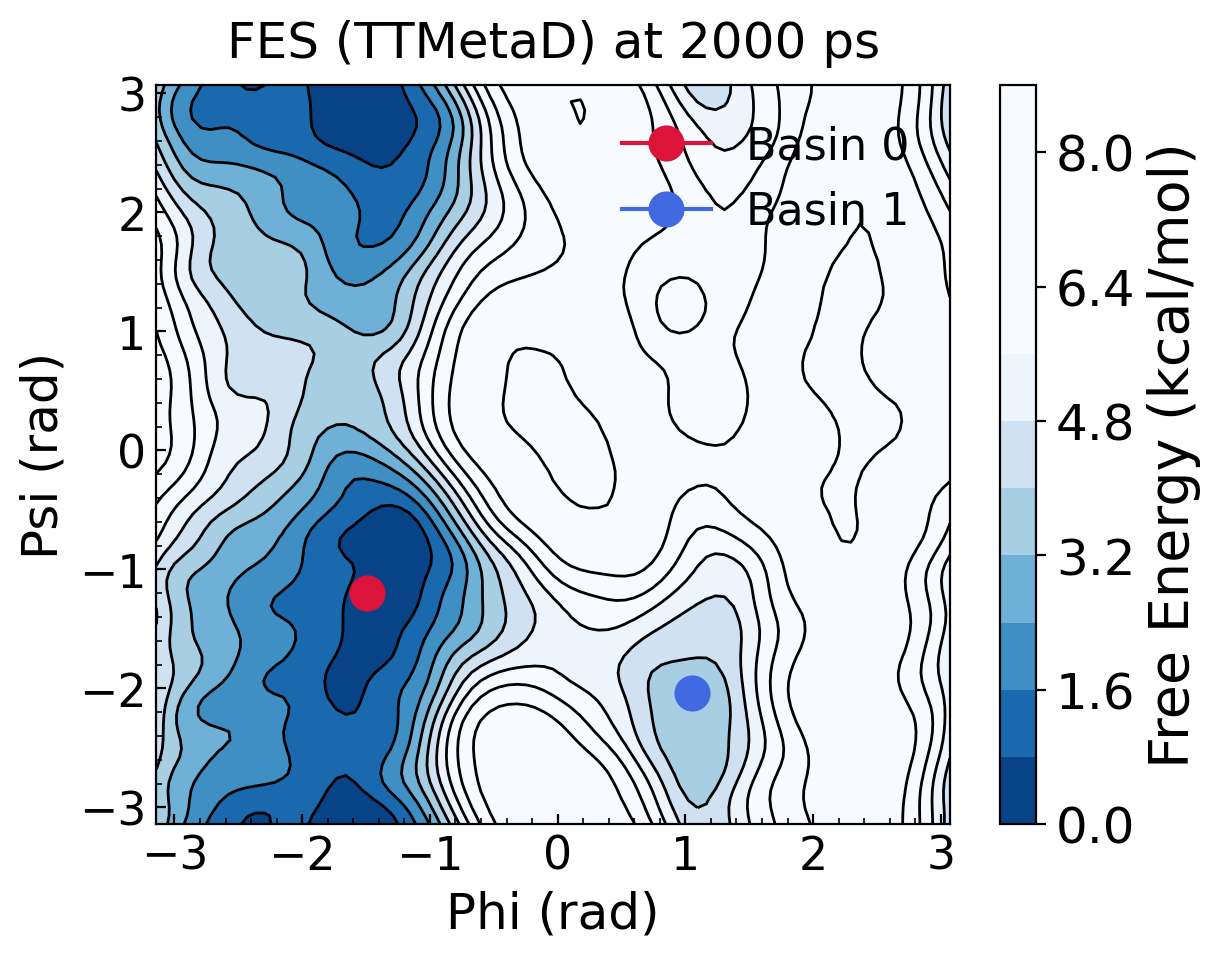

In [3]:
# Load the COLVAR file containing the phi, psi, and metadynamics bias data
time_list = [400, 800, 1200, 2000]
label_list = [3, 7, 11, 19]
for time, label in zip(time_list, label_list):
    data = np.loadtxt(f'fes/fes_ttmetad{label}.dat', comments=['#', '@'])
    level = 12
    alg = "mpl2014"
    linewidth, alpha = 2, 1

    # Extract the phi, psi, and bias data from the columns of the data array
    phi = data[:,0]
    psi = data[:,1]
    bias = (data[:,2] - np.min(data[:,2]))/4.184

    # Reshape the bias data into a 2D grid
    nbins = int(np.sqrt(len(phi)))
    bias_grid = np.reshape(bias, (nbins, nbins))

    # Define the phi and psi bin edges for the histogram
    phi_bins = np.linspace(-np.pi, np.pi, nbins+1)
    psi_bins = np.linspace(-np.pi, np.pi, nbins+1)

    # Create a contour plot of the bias grid
    # Set the color of the largest region to white
    plt.contour(phi_bins[:-1], psi_bins[:-1], bias_grid, levels=level, colors='black',
                antialiased=100, linewidths=1, linestyles="solid", algorithm=alg, zorder=1)

    plt.contourf(phi_bins[:-1], psi_bins[:-1], bias_grid, levels=level, cmap='Blues_r',
                antialiased=100, algorithm=alg, zorder=0, alpha=alpha,
                vmin=0, vmax=5.5, extend='neither')

    # Add labels and a colorbar to the plot
    plt.xlabel('Phi (rad)', fontsize=fontsize+4)
    plt.ylabel('Psi (rad)', fontsize=fontsize+4)
    plt.xticks(fontsize=fontsize+2.5)
    plt.yticks(fontsize=fontsize+2.5)
    plt.title(f'FES (TTMetaD) at {time} ps', fontsize=fontsize+4, pad=10)
    # ticks direction in
    plt.tick_params(direction='in')
    # minor ticks on for both
    plt.minorticks_on()
    # minor ticks direction in
    plt.tick_params(which='minor', direction='in')
    # set colorbar ticks and labels
    cbar = plt.colorbar()
    cbar.set_label('Free Energy (kcal/mol)', fontsize=fontsize+6)
    cbar.ax.tick_params(labelsize=fontsize+4)
    
    # Add the positions of the transition states to the plot
    # TRANSITIONWELL0=-1.49,-1.20
    # TRANSITIONWELL1=1.05,-2.04
    plt.plot(-1.49, -1.20, marker='o', color="crimson", markersize=12, label='Basin 0')
    plt.plot(1.05, -2.04, marker='o', color="royalblue", markersize=12, label='Basin 1')
    plt.legend(framealpha=0, fontsize=fontsize+2)
    # Save the plot to a file
    plt.savefig(f'fes_{time}ps.png', dpi=300, bbox_inches='tight')
    plt.show()

### plot the 2d PMF at 50 ns

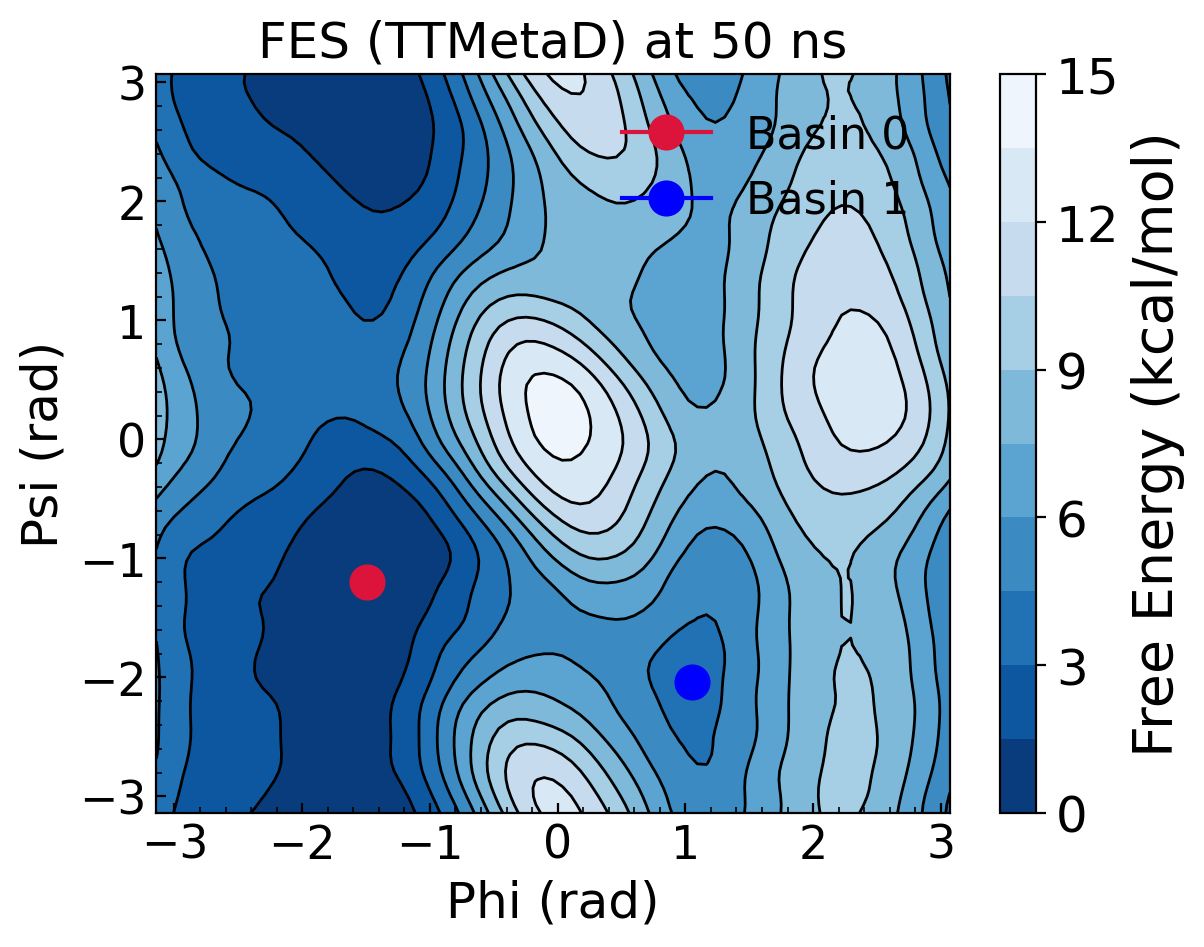

In [4]:
# Load the COLVAR file containing the phi, psi, and metadynamics bias data
time_list = [50]
label_list = ["_overall0"]
for time, label in zip(time_list, label_list):
    data = np.loadtxt(f'fes/fes_ttmetad{label}.dat', comments=['#', '@'])
    level = 12
    alg = "mpl2014"
    linewidth, alpha = 2, 1

    # Extract the phi, psi, and bias data from the columns of the data array
    phi = data[:,0]
    psi = data[:,1]
    bias = (data[:,2] - np.min(data[:,2]))/4.184

    # Reshape the bias data into a 2D grid
    nbins = int(np.sqrt(len(phi)))
    bias_grid = np.reshape(bias, (nbins, nbins))

    # Define the phi and psi bin edges for the histogram
    phi_bins = np.linspace(-np.pi, np.pi, nbins+1)
    psi_bins = np.linspace(-np.pi, np.pi, nbins+1)

    # Create a contour plot of the bias grid
    # Set the color of the largest region to white
    plt.contour(phi_bins[:-1], psi_bins[:-1], bias_grid, levels=level, colors='black',
                antialiased=100, linewidths=1, linestyles="solid", algorithm=alg, zorder=1)

    plt.contourf(phi_bins[:-1], psi_bins[:-1], bias_grid, levels=level, cmap='Blues_r',
                antialiased=100, algorithm=alg, zorder=0, alpha=alpha)
                # vmin=0, vmax=5.5, extend='neither')

    # Add labels and a colorbar to the plot
    plt.xlabel('Phi (rad)', fontsize=fontsize+4)
    plt.ylabel('Psi (rad)', fontsize=fontsize+4)
    plt.xticks(fontsize=fontsize+2.5)
    plt.yticks(fontsize=fontsize+2.5)
    plt.title(f'FES (TTMetaD) at {time} ns', fontsize=fontsize+4, pad=6)
    # ticks direction in
    plt.tick_params(direction='in')
    # minor ticks on for both
    plt.minorticks_on()
    # minor ticks direction in
    plt.tick_params(which='minor', direction='in')
    # set colorbar ticks and labels
    cbar = plt.colorbar()
    cbar.set_label('Free Energy (kcal/mol)', fontsize=fontsize+6)
    cbar.ax.tick_params(labelsize=fontsize+4)
    
    # Add the positions of the transition states to the plot
    # TRANSITIONWELL0=-1.49,-1.20
    # TRANSITIONWELL1=1.05,-2.04
    plt.plot(-1.49, -1.20, marker='o', color="crimson", markersize=12, label='Basin 0')
    plt.plot(1.05, -2.04, marker='o', color="blue", markersize=12, label='Basin 1')
    plt.legend(framealpha=0, fontsize=fontsize+2)
    # Save the plot to a file
    plt.savefig(f'fes_{time}ns.png', dpi=300, bbox_inches='tight')